<a href="https://colab.research.google.com/github/rahatmoktadir03/DataCamp-Projects/blob/main/Inspecting_Electric_Vehicle_Charging_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Futuristic electric car charging](ev_charging.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, understanding trends in charging facilities and sales is essential to inform strategic planning.

As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data.

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments.
___

### The Data
&nbsp;

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Total EV sales in 2018: 361315.0
Trend between 2015 and 2018: same
ev_sales_2018 = 361315
trend = 'same'


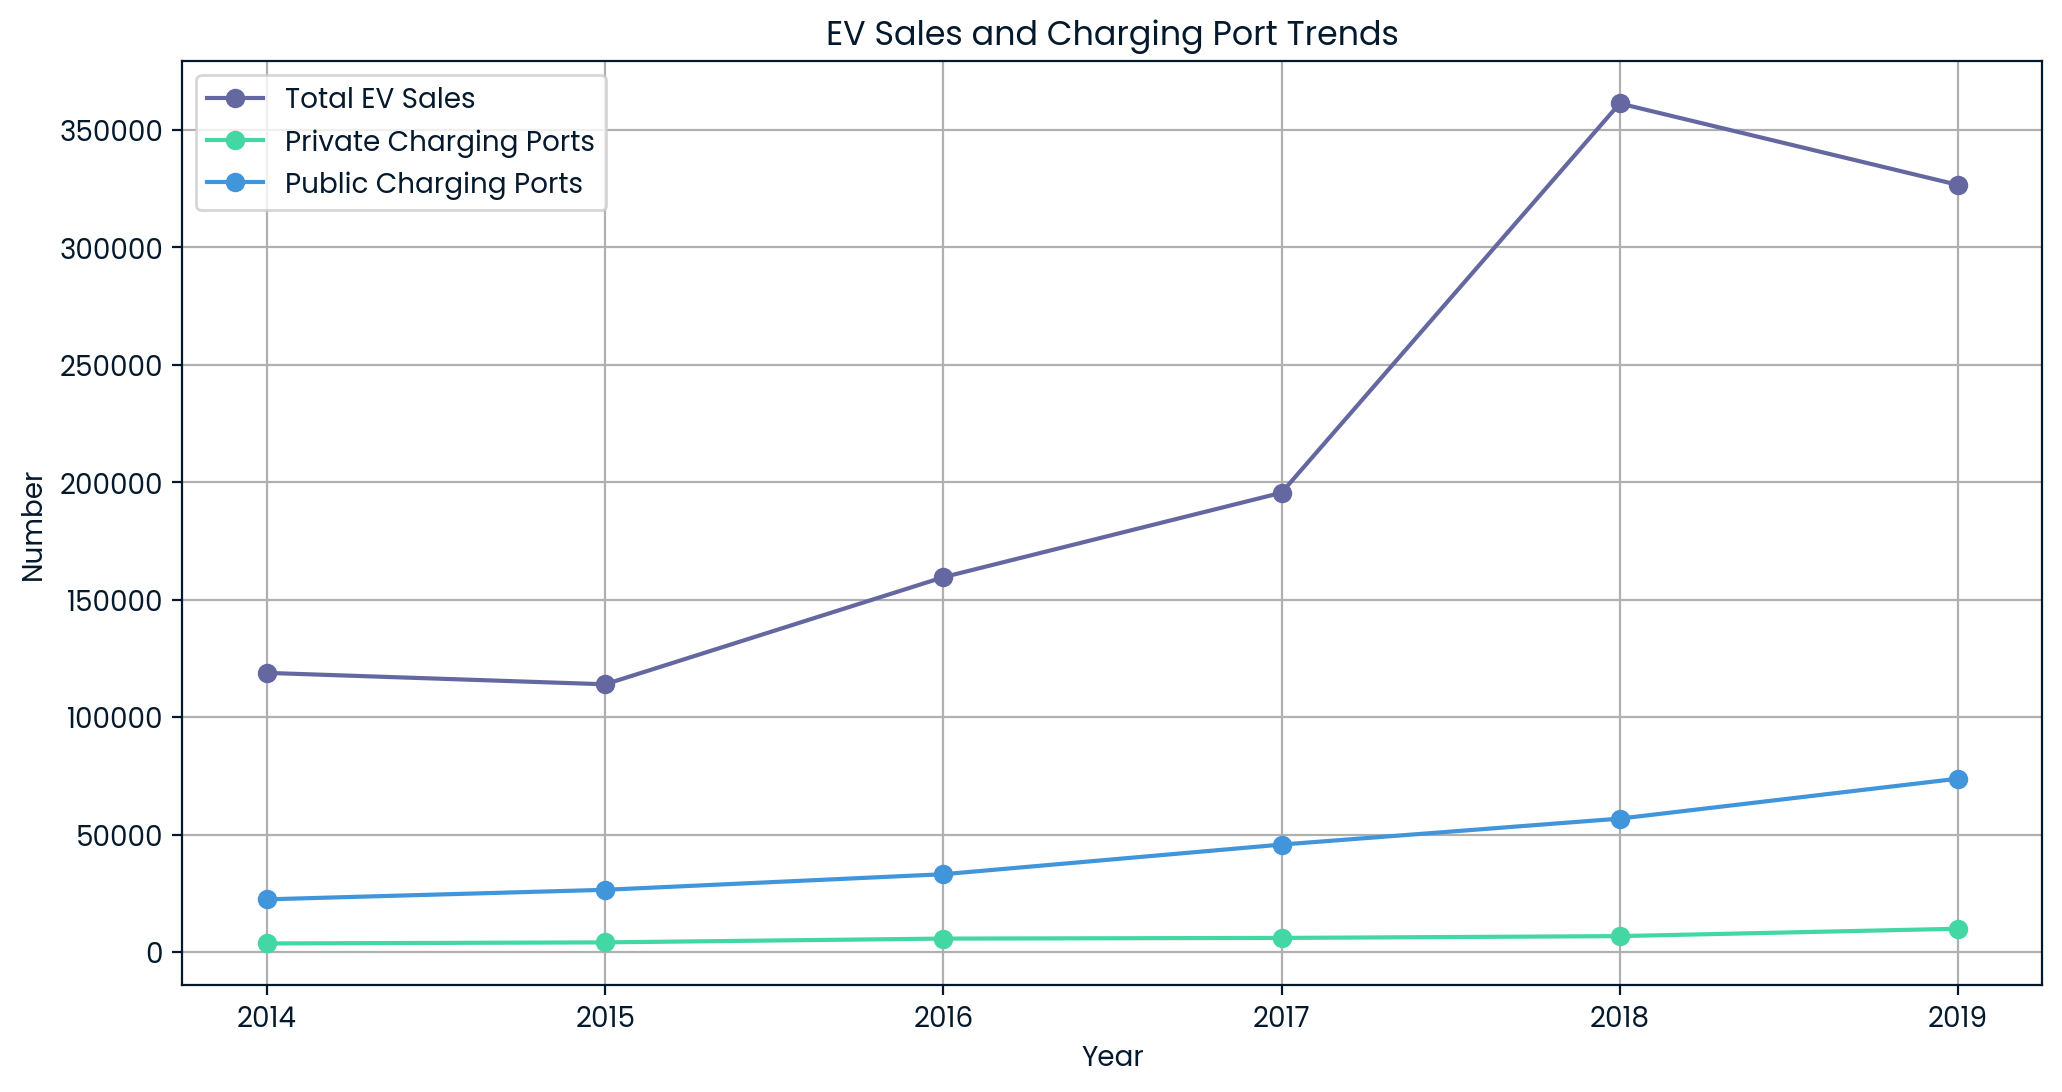

In [ ]:
# Load the datasets
ev_sales_df = pd.read_csv('ev_sales.csv')
private_charging_df = pd.read_csv('private_ev_charging.csv')
public_charging_df = pd.read_csv('public_ev_charging.csv')

# Calculate total EV sales per year
ev_sales_df['sales'] = pd.to_numeric(ev_sales_df['sales'], errors='coerce')
ev_sales_df['sales'] = ev_sales_df['sales'].fillna(0)
total_sales_per_year = ev_sales_df.groupby('year')['sales'].sum().reset_index()

# Calculate total sales for 2018
ev_sales_2018 = total_sales_per_year[total_sales_per_year['year'] == 2018]['sales'].iloc[0]
print(f"Total EV sales in 2018: {ev_sales_2018}")

# Merge the datasets
merged_df = pd.merge(total_sales_per_year, private_charging_df, on='year', how='inner')
merged_df = pd.merge(merged_df, public_charging_df, on='year', how='inner')

# Plot trends
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(merged_df['year'], merged_df['sales'], marker='o', linestyle='-', label='Total EV Sales')
ax.plot(merged_df['year'], merged_df['private_ports'], marker='o', linestyle='-', label='Private Charging Ports')
ax.plot(merged_df['year'], merged_df['public_ports'], marker='o', linestyle='-', label='Public Charging Ports')

ax.set_title('EV Sales and Charging Port Trends')
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.legend()
ax.grid(True)
plt.savefig('ev_trends.png')

# Analyze the trend between 2015 and 2018
trend_data = merged_df[(merged_df['year'] >= 2015) & (merged_df['year'] <= 2018)]

sales_trend = trend_data['sales'].is_monotonic_increasing
private_ports_trend = trend_data['private_ports'].is_monotonic_increasing
public_ports_trend = trend_data['public_ports'].is_monotonic_increasing

if sales_trend and private_ports_trend and public_ports_trend:
    trend = 'same'
else:
    trend = 'different'

print(f"Trend between 2015 and 2018: {trend}")
ev_sales_2018 = 361315
print(f"ev_sales_2018 = {ev_sales_2018}")
print(f"trend = '{trend}'")

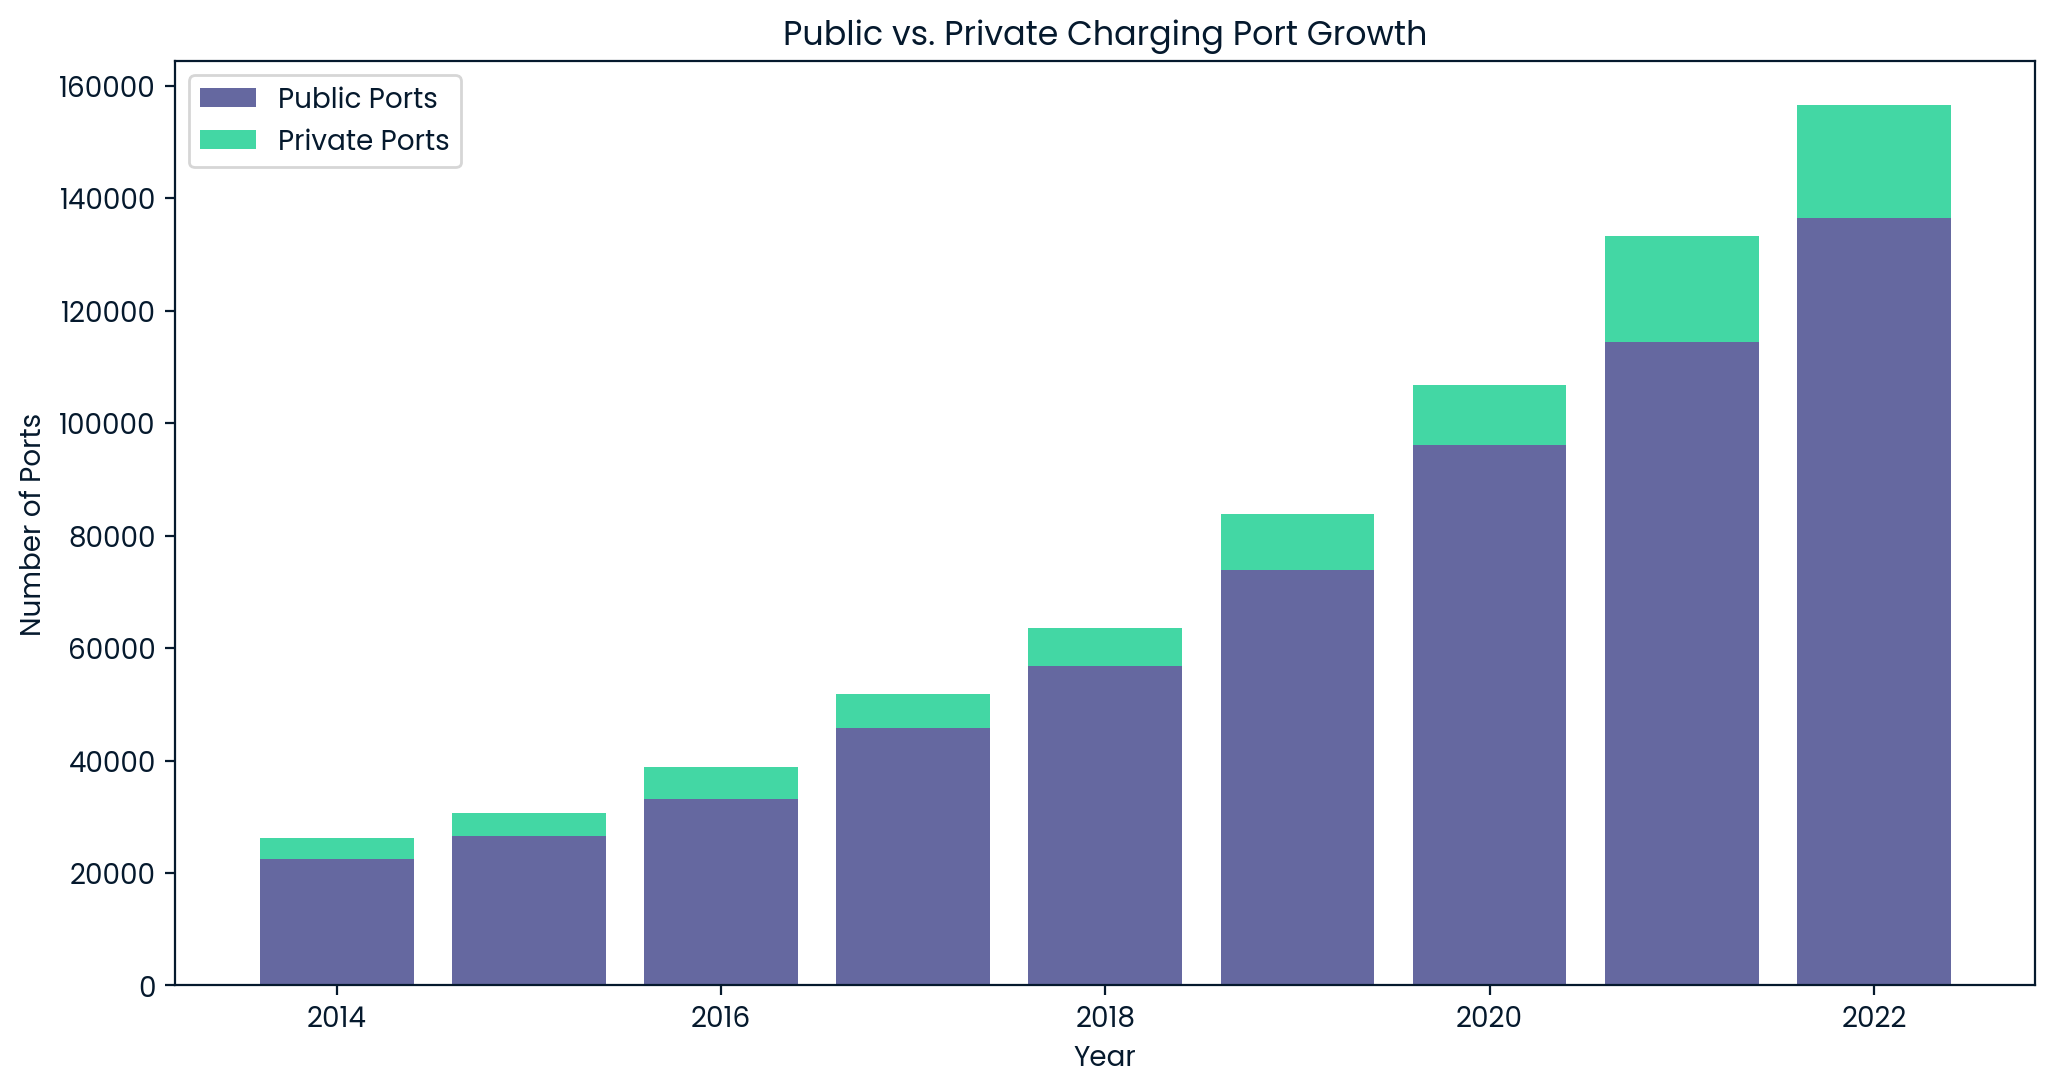

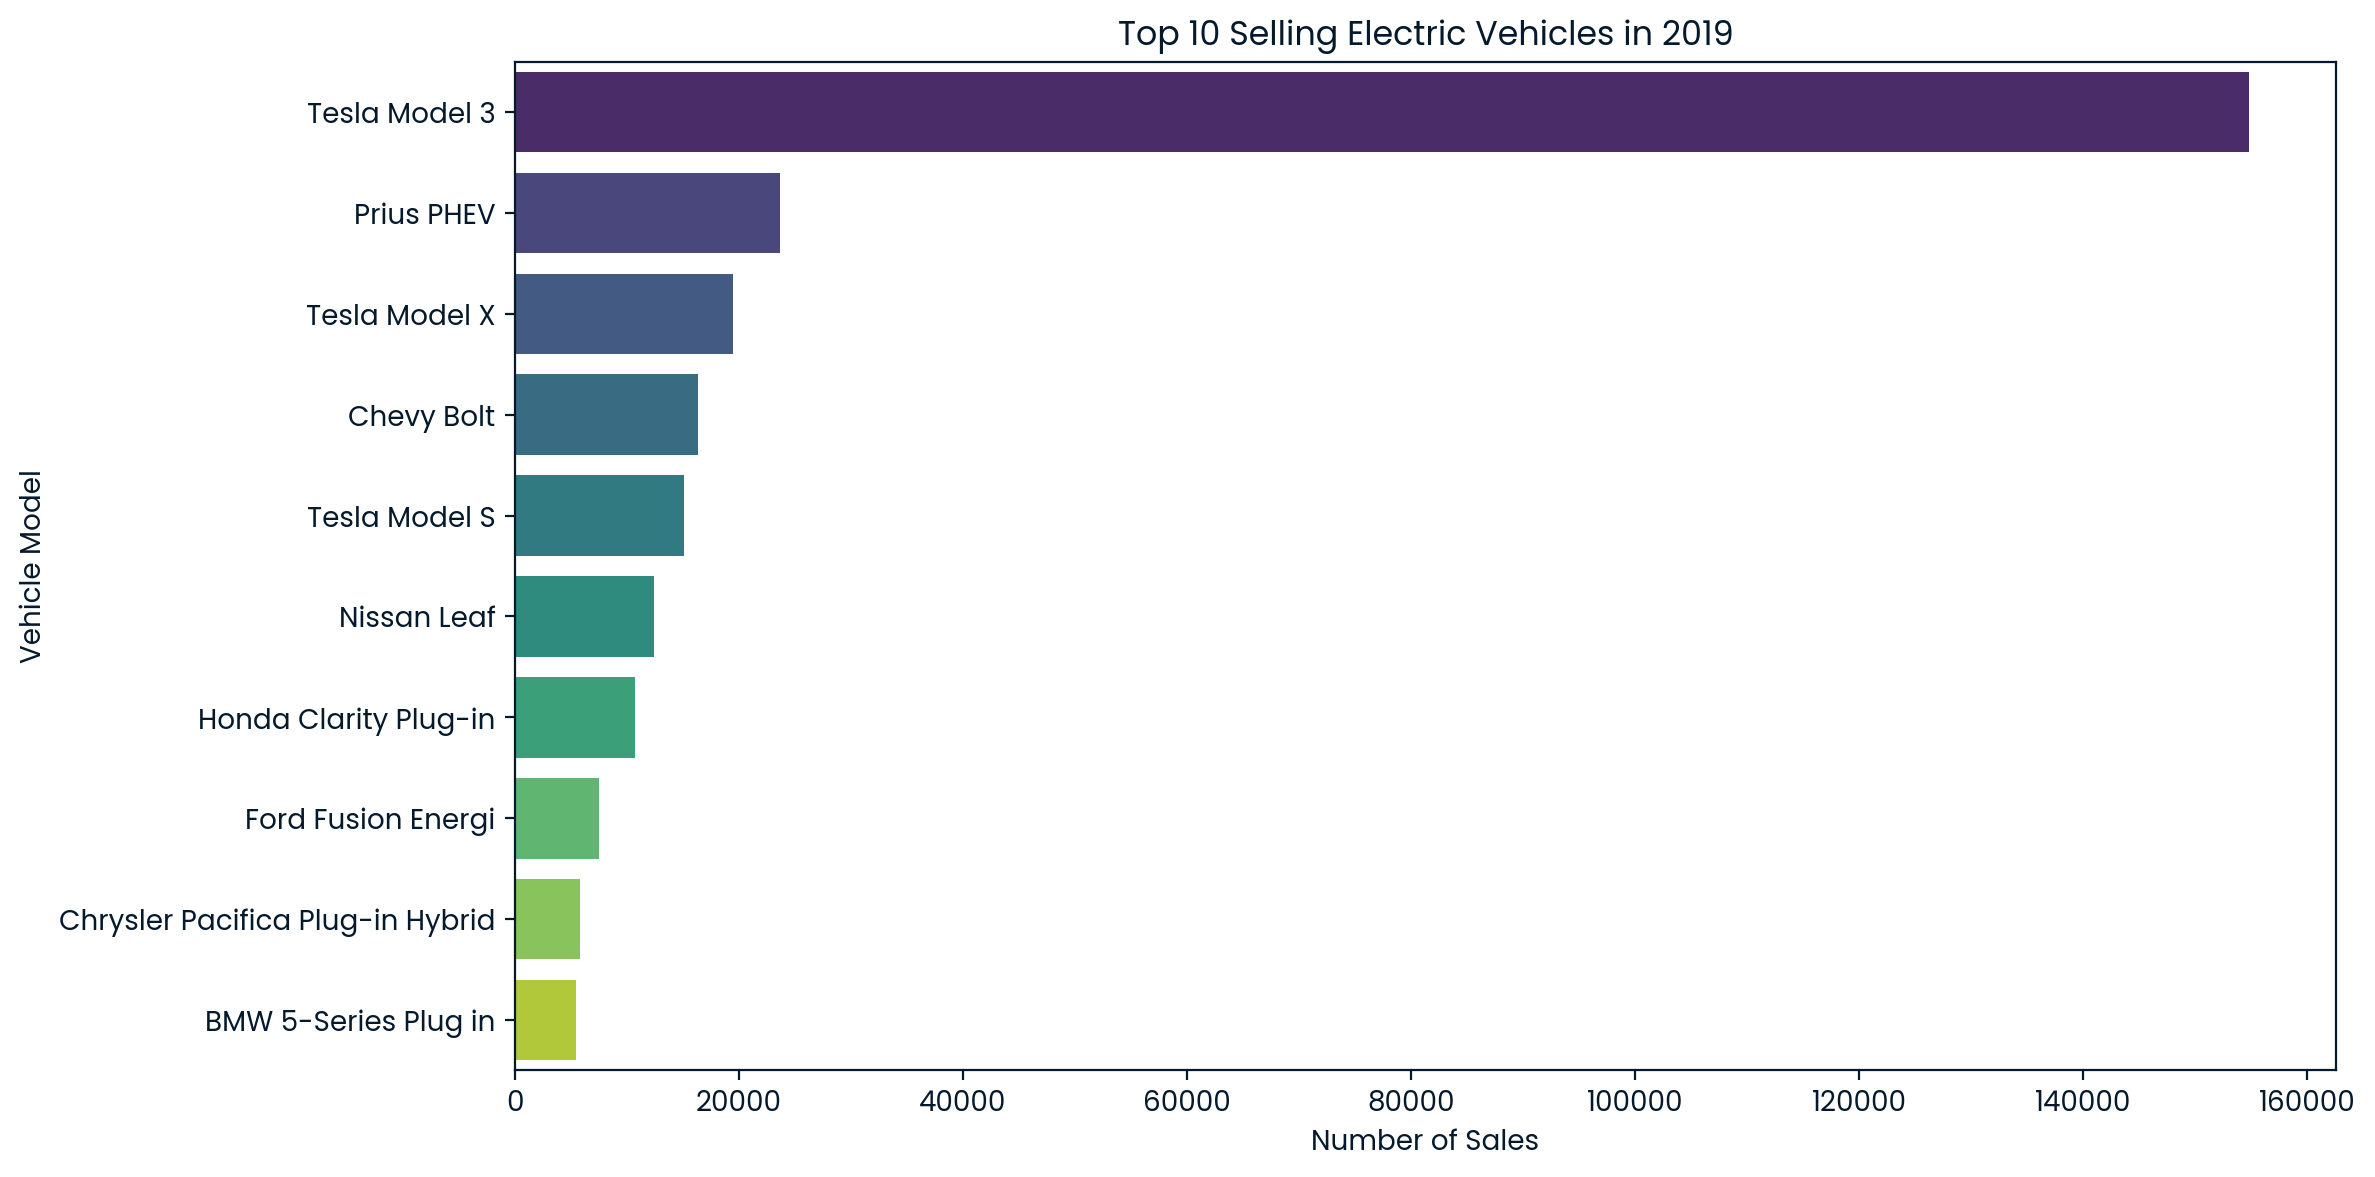

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
ev_sales_df = pd.read_csv('ev_sales.csv')
private_charging_df = pd.read_csv('private_ev_charging.csv')
public_charging_df = pd.read_csv('public_ev_charging.csv')

# Merge the charging datasets
charging_df = pd.merge(private_charging_df, public_charging_df, on='year')

# Create a stacked bar chart for public vs private ports
plt.figure(figsize=(12, 6))
plt.bar(charging_df['year'], charging_df['public_ports'], label='Public Ports')
plt.bar(charging_df['year'], charging_df['private_ports'], bottom=charging_df['public_ports'], label='Private Ports')
plt.xlabel('Year')
plt.ylabel('Number of Ports')
plt.title('Public vs. Private Charging Port Growth')
plt.legend()
plt.savefig('public_vs_private_ports.png')
plt.show()

# Get the most recent year from the sales data
ev_sales_df['sales'] = pd.to_numeric(ev_sales_df['sales'], errors='coerce')
ev_sales_df.dropna(subset=['sales'], inplace=True)
most_recent_year = int(ev_sales_df['year'].max())

# Filter for the most recent year and get the top 10 selling vehicles
top_10_vehicles = ev_sales_df[ev_sales_df['year'] == most_recent_year].nlargest(10, 'sales')

# Create a bar chart for the top 10 selling vehicles
plt.figure(figsize=(12, 6))
sns.barplot(x='sales', y='Vehicle', data=top_10_vehicles, palette='viridis')
plt.xlabel('Number of Sales')
plt.ylabel('Vehicle Model')
plt.title(f'Top 10 Selling Electric Vehicles in {most_recent_year}')
plt.tight_layout()
plt.savefig('top_10_vehicles.png')
plt.show()

In [ ]:
import pandas as pd

# Load the datasets
private_charging_df = pd.read_csv('private_ev_charging.csv')
public_charging_df = pd.read_csv('public_ev_charging.csv')
ev_sales_df = pd.read_csv('ev_sales.csv')

# Calculate the average number of ports per station for the most recent year
most_recent_charging_year = private_charging_df['year'].max()
private_latest = private_charging_df[private_charging_df['year'] == most_recent_charging_year]
public_latest = public_charging_df[public_charging_df['year'] == most_recent_charging_year]

avg_private_ports_per_station = private_latest['private_ports'] / private_latest['private_station_locations']
avg_public_ports_per_station = public_latest['public_ports'] / public_latest['public_station_locations']

print(f"Average private ports per station in {most_recent_charging_year}: {avg_private_ports_per_station.iloc[0]:.2f}")
print(f"Average public ports per station in {most_recent_charging_year}: {avg_public_ports_per_station.iloc[0]:.2f}")

# Calculate the market share of the top 3 selling models in the most recent year
ev_sales_df['sales'] = pd.to_numeric(ev_sales_df['sales'], errors='coerce')
ev_sales_df.dropna(subset=['sales'], inplace=True)
most_recent_sales_year = int(ev_sales_df['year'].max())
sales_latest_year = ev_sales_df[ev_sales_df['year'] == most_recent_sales_year]

total_sales_latest_year = sales_latest_year['sales'].sum()
top_3_models = sales_latest_year.nlargest(3, 'sales')

print("\nMarket share of top 3 models in", most_recent_sales_year)
for index, row in top_3_models.iterrows():
    market_share = (row['sales'] / total_sales_latest_year) * 100
    print(f"- {row['Vehicle']}: {market_share:.2f}%")

# Find the models with the most significant sales growth
sales_previous_year = ev_sales_df[ev_sales_df['year'] == most_recent_sales_year - 1]
merged_sales = pd.merge(sales_latest_year, sales_previous_year, on='Vehicle', suffixes=('_latest', '_previous'))
merged_sales['sales_growth'] = merged_sales['sales_latest'] - merged_sales['sales_previous']

top_5_growth = merged_sales.nlargest(5, 'sales_growth')

print(f"\nTop 5 models with the most significant sales growth from {most_recent_sales_year - 1} to {most_recent_sales_year}:")
for index, row in top_5_growth.iterrows():
    print(f"- {row['Vehicle']}: {int(row['sales_growth'])} additional sales")

Average private ports per station in 2022: 4.51
Average public ports per station in 2022: 2.54

Market share of top 3 models in 2019
- Tesla Model 3: 47.40%
- Prius PHEV: 7.23%
- Tesla Model X: 5.95%

Top 5 models with the most significant sales growth from 2018 to 2019:
- Tesla Model 3: 15058 additional sales
- VW e-Golf: 3509 additional sales
- Jaguar I-Pace: 2201 additional sales
- Mercedes GLC 350e Hybrid: 1892 additional sales
- Kia Niro Plug In: 662 additional sales
